# Ejericicio1

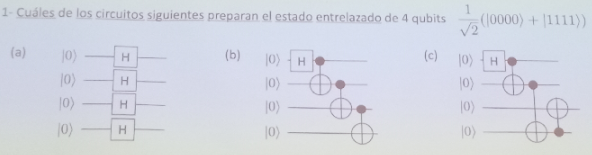

Cuales de los circuitos siguientes preparan el estado entrelazado de 4 qubits $ \frac{1}{\sqrt{2}} (\ket{0000}+\ket{1111})$

a)

```
     ┌───┐
|0>  ┤ H ├
     ├───┤
|0>  ┤ H ├
     ├───┤
|0>  ┤ H ├
     ├───┤
|0>  ┤ H ├
     └───┘
```

b)

```
     ┌───┐
|0>  ┤ H ├──■────────────
     └───┘┌─┴─┐
|0>  ─────┤ X ├──■───────
          └───┘┌─┴─┐
|0>  ──────────┤ X ├──■──
               └───┘┌─┴─┐
|0>  ───────────────┤ X ├
                    └───┘
```

c)

```
     ┌───┐
|0>  ┤ H ├──■────────────
     └───┘┌─┴─┐
|0>  ─────┤ X ├──■───────
          └───┘  │  ┌───┐
|0>  ────────────┼──┤ X ├
               ┌─┴─┐└─┬─┘
|0>  ──────────┤ X ├──■──
               └───┘
```


###

## Respuesta 1a) primer circuito

 Incorrecto. No puede preparar el estado desado, porque las compuertas de un qubit no entrelazan. Ademas, se demuestra q el estado resultante es otro:

$$ salida = H_1H_2H_3H_4\ket{0000} =$$ $$= (H\otimes H\otimes H\otimes H) (\ket{0}\otimes\ket{0}\otimes\ket{0}\otimes\ket{0}) $$
$$ = ( H\ket{0} \otimes  H\ket{0} \otimes  H\ket{0} \otimes  H\ket{0} ) $$
por cada qubit:
$$ H\ket{0} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \ket{+}$$

esto, es dim 1x2, la productoria será de 1⁴x2⁴, en ppio son muchas cuentas, pero como la primera matriz son todos unos, son cuatro copias...

$$ salida = (\frac{1}{\sqrt{2}})^4 \begin{pmatrix} 1 \\ ... \\ 1 \\ \end{pmatrix} = \frac{1}{8} \ket{++++}$$


validación con qiskit:

In [2]:
import qiskit as qk
import sympy as sp

qc1=qk.QuantumCircuit(4,0)
qc1.h(range(4))
qc1_matrix=sp.Matrix(qk.quantum_info.Operator.from_circuit(qc1))

ket_cero= sp.Matrix([[1], [0]])
entrada=sp.kronecker_product(ket_cero, ket_cero, ket_cero, ket_cero)
salida=qc1_matrix*entrada
print(f"salida, dimensiones {salida.shape}:")
salida

salida, dimensiones (16, 1):


Matrix([
[0.25],
[0.25],
[0.25],
[0.25],
[0.25],
[0.25],
[0.25],
[0.25],
[0.25],
[0.25],
[0.25],
[0.25],
[0.25],
[0.25],
[0.25],
[0.25]])

la salida es $$(\ket{+} \otimes  \ket{+} \otimes  \ket{+} \otimes  \ket{+} ) =$$

$$\ket{++++} \neq  \frac{1}{\sqrt{2}} (\ket{0000}+\ket{1111}) $$ QED

In [2]:
ket_mas= 2**(-0.5)*sp.Matrix([[1], [1]])

#
# calculo |++++> para comparar con la salida de la compuerta
#
salida_mate = sp.kronecker_product(ket_mas,ket_mas,ket_mas,ket_mas)
#verif_cuentas = (salida_mate == salida)
verif_cuentas = salida_mate.equals(salida)
if verif_cuentas:
    print(f"verificado con sympy: salida_mate.equals(salida) == {verif_cuentas}")
else:
    #LPM - código copipasteado
    diff = salida_mate - salida
    #print(f"Difference matrix (salida_mate - salida):{diff}")
    #print(f"\nMaximum absolute difference: {max(abs(float(x)) for x in diff)}")
    verif_cuentas = max(abs(float(x)) for x in diff) < 1e-15
    print(f"Are  salida_mate and salida numerically equal? {verif_cuentas}")
    if not verif_cuentas:
        # LPM^2
        # Check individual values
        print(f"\nFirst element of salida_mate: {salida_mate[0]}")
        print(f"First element of salida: {salida[0]}")
        print(f"Type of salida_mate elements: {type(salida_mate[0])}")
        print(f"Type of salida elements: {type(salida[0])}")
qc1.draw()

Are  salida_mate and salida numerically equal? True


┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘

#### Comentario de la cátedra:

Estamos mirando un sistema de 4 qubits: el espacio es de dimensión 2^4=16. Los 16 kets de la base computacional |0000⟩, |0001⟩, |0010⟩, ..., |1111⟩, generan el espacio en cuestión. Hay que recordar que un ket |abcd⟩ para nosotros representa el producto tensorial de los kets de un qubit: |abcd⟩=|a⟩⊗|b⟩⊗|c⟩⊗|d⟩.
El circuito (a) es el más sencillo porque solo tiene compuertas de 1 qubit como vos decís. Y tu observación de que no puede generar entrelazamiento y por lo tanto no puede producir el estado buscado, es correcta.
Si queremos escribir la acción del circuito (a), sería: (H⊗H⊗H⊗H)(|0⟩⊗|0⟩⊗|0⟩⊗|0⟩). No es la manera habitual ni práctica de escribirlo, solo lo escribo así para mostrar más precisamente qué significa el cálculo que debemos hacer:
(H⊗H⊗H⊗H)(|0⟩⊗|0⟩⊗|0⟩⊗|0⟩) = (H|0⟩)⊗(H|0⟩)⊗(H|0⟩)⊗(H|0⟩) = |+⟩⊗|+⟩⊗|+⟩⊗|+⟩
Una forma más práctica de escribirlo sería:
H1 H2 H3 H4 |0000⟩ = |++++⟩

## Respuesta 1b) segundo circuito

Este puede ser, pq cnot() entrelaza. Y vemos en el estado pedido, que los únicos estados de la base con amplitud $\neq0$ eran |0000> y |1111>, es decir los cuatro qb correlacionados 100%. Verifico:


### camino <span style="color:red">**ERRÓNEO**</span>

$$ salida_1 = H\ket{0} = \ket{+} $$
$$ salida_2 = (cnot(salida_1,\ket{0}) = ? $$
$$ salida_3 = (cnot(salida_2,\ket{0}) = ?  $$
$$ salida_4 = (cnot(salida_3,\ket{0}) = ?  $$


$$ salida_1 \otimes salida_2 \otimes salida_3 \otimes salida_4 \overset{?}{=}  \frac{1}{\sqrt{2}} (\ket{0000}+\ket{1111})$$

$$ salida_2 = cnot\left(\frac{1}{\sqrt{2}}\begin{pmatrix} 1\\ 1\end{pmatrix} \otimes \begin{pmatrix} 1\\ 0\end{pmatrix} \right)$$
$$ = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0  & 1  & 0 & 0 \\ 0 & 0 &  0 & 1 \\  0  & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\  1 \\ 0 \end{pmatrix}  = $$
$$ = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 0 \\  0 \\ 1 \end{pmatrix}$$

valido con qiskit:

In [3]:
import qiskit as qk
import sympy as sp

qc2_2qb=qk.QuantumCircuit(2, 0)
qc2_2qb.cx(0, 1)
# no este no me anda:
#qc2_2qb_matrix=sp.Matrix(qk.quantum_info.Operator.from_circuit(qc2_2qb))
qc2_2qb_matrix=sp.Matrix([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
dos_raizdedos = sp.symbols("1/sqrt(2)")
ket_cinco= dos_raizdedos*sp.Matrix([[1], [0], [1], [0]])  # |11>
salida1=ket_cinco
print("salida de  cnot(H|0>,|0>)")
salida2 = qc2_2qb_matrix * salida1 # cnot(H|0>,|0>)
salida2
#validacion v0: bien los coeficientes, pero me quedó desnormalizado, error arrastrado de |+> sin la raìz de dos. mal ahí.
#validacion v1: vamo lo pibe!

salida de  cnot(H|0>,|0>)


Matrix([
[1/sqrt(2)],
[        0],
[        0],
[1/sqrt(2)]])

validada salida_2, sigo con salida_3:

$$ salida_3 = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0  & 1  & 0 & 0 \\ 0 & 0 &  0 & 1 \\  0  & 0 & 1 & 0 \end{pmatrix} \left(\frac{1}{\sqrt{2}}\begin{pmatrix} 1 \\ 0 \\  0 \\ 1 \end{pmatrix}\right)  = $$
$$ = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0  & 1  & 0 & 0 \\ 0 & 0 &  0 & 1 \\  0  & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\  0 \\ 1 \end{pmatrix} = $$
$$ = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\  1 \\ 0 \end{pmatrix}  $$


| notas de autocorrección:                                             |
|:---------------------------------------------------------------------|
| tendría que haberme dado cuenta que necesito una matriz de $2^4*2^4$ |
| "recalculando" con el comentario de la cátedra                       |


#### comentario de la cátedra

El estado final es lo que se llama GHZ, es una generalización de estados de Bell a dimensiones arbitrarias. ya usando la notación más práctica, tenemos: C34 C23 C12 H1 |0000⟩, donde $C_{ij}$ es la cnot con control en $i$ sobre $j$. Entonces,
C34 C23 C12 H1 |0000⟩ = C34 C23 C12 |+000⟩ = (1/sqrt(2)) C34 C23 C12 (|0⟩+|1⟩) |000⟩ = ..., donde evalué el H1, y dejé escrito el |+⟩ en la base computacional para aplicar más fácil los cnots.

Sigo:
... = (1/sqrt(2)) C34 C23 C12 (|0000⟩+|1000⟩) = (1/sqrt(2)) C34 C23 (C12 |0000⟩ + C12 |1000⟩) = (1/sqrt(2)) C34 C23 (|0000⟩ + |1100⟩) =...

Ahí ya apliqué el primer cnot. Siguiendo, llegás al resultado buscado.
Fijate que todo el tiempo trabajamos sobre el espacio de 4 qubits, que sale del producto tensorial de los espacios de 1 qubit.

### camino <span style="color:green">**correcto**</span>

$$C_{34} C_{23} C_{12} H_1 \ket{0000} == $$
$$== C_{34} C_{23} C_{12} \ket{+000} == $$
$$== 2^{-0.5}  C_{34} C_{23} C_{12} (\ket{0000} + \ket{1000}) == $$
$$== 2^{-0.5} C_{34} C_{23} C_{12} \ket{0000} + 2^{-0.5} C_{34} C_{23} C_{12} \ket{1000} == $$
$$== 2^{-0.5} C_{34} C_{23} \ket{0000} + 2^{-0.5} C_{34} C_{23} \ket{1100} == $$
$$== 2^{-0.5} C_{34} \ket{0000} + 2^{-0.5} C_{34} \ket{1110} == $$
$$== 2^{-0.5} (\ket{0000} + \ket{1111}) $$


QED. esa salida es \~(|0000>+|1111>), el circuito (b) prepara el estado pedido



### Respuesta 1c) tercer circuito

Tambien sirve, es equivalente al circuito (1b).

Valido con qiskit:


In [8]:
#
# valido tambien este circuito completo, por las dudas
#
import qiskit as qk
import sympy as sp

qc3_4qb=qk.QuantumCircuit(4, 0)
qc3_4qb.h(0)
qc3_4qb.cx(0, 1)
qc3_4qb.cx(1, 3)
qc3_4qb.cx(3, 2)
qc3_4qb_matrix=sp.Matrix(qk.quantum_info.Operator.from_circuit(qc3_4qb))
ket_cerocerocerocero= sp.zeros(16,1) # |0000> , me canse de contar ceros, descubrí sp.zeros
ket_cerocerocerocero[0]=1
#print(ket_cerocerocerocero)
print(qc3_4qb.draw())
print("salida de  cnot(cnot(cnot(H|0>),|0>),|0>),|0>)")
salida_4qb1 = qc3_4qb_matrix * ket_cerocerocerocero # cnot(cnot(cnot(H|0>),|0>),|0>),|0>)
salida_4qb1


     ┌───┐               
q_0: ┤ H ├──■────────────
     └───┘┌─┴─┐          
q_1: ─────┤ X ├──■───────
          └───┘  │  ┌───┐
q_2: ────────────┼──┤ X ├
               ┌─┴─┐└─┬─┘
q_3: ──────────┤ X ├──■──
               └───┘     
salida de  cnot(cnot(cnot(H|0>),|0>),|0>),|0>)


Matrix([
[0.707106781186547],
[                0],
[                0],
[                0],
[                0],
[                0],
[                0],
[                0],
[                0],
[                0],
[                0],
[                0],
[                0],
[                0],
[                0],
[0.707106781186547]])



---

# Ejercicio2

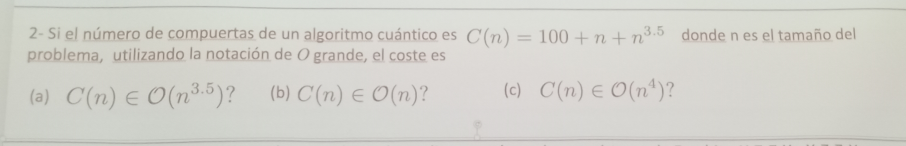

Si el número de compuertas de un algoritmo cuántico es $C(n) = 100+n+n^{3.5}$  donde $n$ es el tamaño del problema, utilizando la notaciòn de O grande, el coste es

a) ¿ $C(n) \in O(n^{3.5})$ ?

b) ¿ $C(n) \in O(n)$ ?

c) ¿ $C(n) \in O(n^4)$ ?

### Respuesta 2)

2a) Correcto. El costo es $O(n^{3.5})$,  ya que el primer término, $100$, vale $O(0)$ y el segundo término, $O(n)$, es de orden inferior al tercer término.

2b) Incorrecto. $O(n)$ es de orden menor al tercer término, $O(n^{3.5})$

2c) Correcto, si el problema es $O(n^{3.5})$ entonces también será de órdenes superiores como $O(n^4)$

---



# Ejercicio3

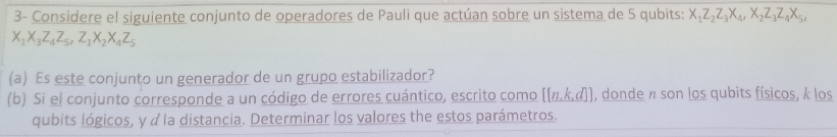

Considere el siguiente conjunto de operadores de Pauli que actúan sobre un sistema de 5 qubits: $\langle X_1Z_2Z_3X_4, X_2Z_3Z_4X_5,X_1X_3Z_4Z_5,Z_1X_2X_4Z_5\rangle$

3a) Es este conjunto un generador de un grupo estabilizador?

3.b) Si el conjunto corresponde a un código de errores cuántico, escrito como  $[[n,k,d]]$, donde $n$ son los qubits físicos, $k$ los qubits lógicos, y $d$ la distancia. Determinar los valores de estos parámetros.



### Respuesta 3a)


| nota de autocorrección:                                                                                                                         |
|:------------------------------------------------------------------------------------------------------------------------------------------------|
| yo sabía q era un conjunto generador, es conocido. Pero la justificación era una sarasa infame, vamos derecho con los comentarios de la cátedra |
|                                                                                                                                                 |

#### comentario de la cátedra

En primer lugar, ver si un conjunto de operadores de Pauli son generadores de un grupo estabilizador se puede probar viendo si todos conmutan entre sí. En este caso, si tomás cualquier par de operadores, tenés que ver la conmutación/anticommutación entre cada par de Paulis sobre 1 qubit. Por ejemplo,
X1 Z2 Z3 X4 I5 contra I1 X2 Z3 Z4 X5, tenés que ver los conmutadores: [X1,I1] = 0, [Z2,X2] != 0, [Z3,Z3] = 0, [X4,Z4] != 0, [I5,X5] = 0. Como hay dos que no conmutan (y como vimos en clase, anticommutan), entonces los operadores completos sí conmutan. Lo mismo para cualquier par del conjunto, y por lo tanto son generadores de un grupo estabilizador. (Al ver que todos conmutan, te estás asegurando que hay un subespacio que estabilizan).


#### resolución

Probar que todos los pares de operadores en el conjunto dado, conmutan.

-  $[X_1Z_2Z_3X_4, X_2Z_3Z_4X_5]$ ? si, en los comentarios de la cátedra
-  $[X_1Z_2Z_3X_4, X_1X_3Z_4Z_5]$ ? si, anticonmuta un número par
    - $[X_1, X_1] = 0 $ (conmuta)
    - $[Z_2, I_2] = 0 $ (conmuta)
    - $[Z_3, X_3] = -2X_3Z_3 $ (anticonmuta)
    - $[X_4, Z_4] = -2Z_4X_4 $ (anticonmuta)
    - $[I_5, Z_5] = 0 $ (conmuta)
-  $[X_2Z_3Z_4X_5, X_1X_3Z_4Z_5 ]$ ?? si, anticonmuta un número par
    - $[I_1, X_1] = 0  $ (conmuta)
    - $[X_2, I_2] = 0 $ (conmuta)
    - $ [Z_3, X_3] \neq 0 $ (anticonmuta)
    - $[Z_4, I_4] = 0$ (conmuta)
    - $[X_5, Z_5] \neq 0$ (anticonmuta)
- $[X_1Z_2Z_3X_4, Z_1X_2X_4Z_5]$  ? #TODO: supongo que si
- $[X_2Z_3Z_4X_5, Z_1X_2X_4Z_5 ]$ ? #TODO: supongo que si
- $[X_1X_3Z_4Z_5,Z_1X_2X_4Z_5 ]$ ? #TODO: supongo que si

#TODO: hacer toda la combinatoria

supongo que hice toda la combinatoria de elementos en S, y es un código estabilzador



In [16]:
import sympy as sp
import qiskit as qk


G=sp.Matrix([[1,0],[1,0],[1,0],[0,1],[0,1],[0,1]])
Ygate=sp.Matrix(qk.circuit.library.standard_gates.YGate())
Ygate



Matrix([
[    0, -1.0*I],
[1.0*I,      0]])

Respuesta 3a)  $[[n,k,d]]$, donde $n$ son los qubits físicos, $k$ los qubits lógicos, y $d$

#### comentario de la cátedrá

En clase se mencionó:

n=5
k=1 ( como hay r=4 generadores: k = n - r = 1 qubit lógico.)
d=3